In [4]:
import pickle
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
import sys
sys.path.append("../code/")

df = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_MF.json', orient='index')

In [3]:
from labs import true_optimal_mf
from objectives import get_random_guess_merit_factor

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
true_optimal_mf[22]

6.205

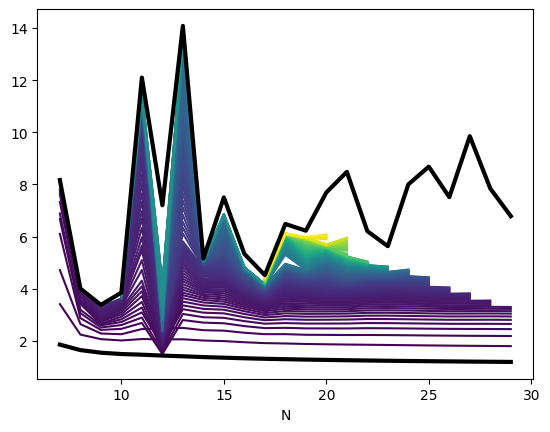

In [79]:
f, ax = plt.subplots()
ps = set(df['p'])
Ns = sorted(set(df['N']))

palette = sns.color_palette('viridis', len(ps))

for idx, p in enumerate(ps):
    df[df['p'] == p].plot(x='N', y='merit factor', ax=ax, c=palette[idx])
    
plt.plot(Ns, [true_optimal_mf[N] for N in Ns], c='k', linewidth=3)
plt.plot(Ns, [get_random_guess_merit_factor(N) for N in Ns], c='k', linewidth=3)
ax.get_legend().remove()
# plt.xlim(min(Ns)-0.5, max(Ns)+0.5)

<AxesSubplot: xlabel='N'>

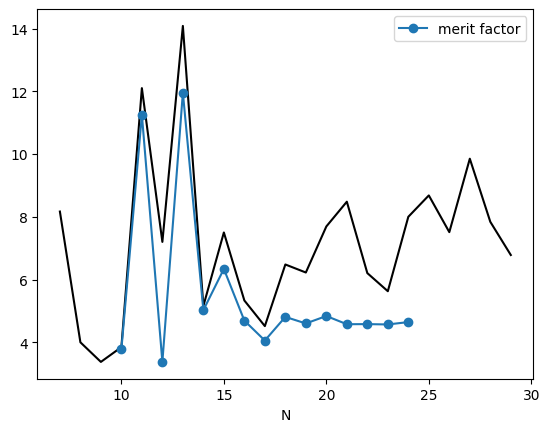

In [35]:
f, ax = plt.subplots()
ax.plot(sorted(set(df['N'])), [true_optimal_mf[N] for N in sorted(set(df['N']))], c='k')
df[df['p'] == 64].plot(x='N', y='merit factor', marker='o', ax=ax)

In [75]:
df[df['p'] == 87].set_index('N')['merit factor']

N
10     3.771887
11    11.500857
12     3.976351
13    13.662817
14     5.061035
15     6.836120
16     4.795604
17     4.135844
18     5.547267
19     4.871685
20     5.193197
21     4.853311
22     4.792447
23     4.746558
Name: merit factor, dtype: float64

<AxesSubplot: xlabel='p'>

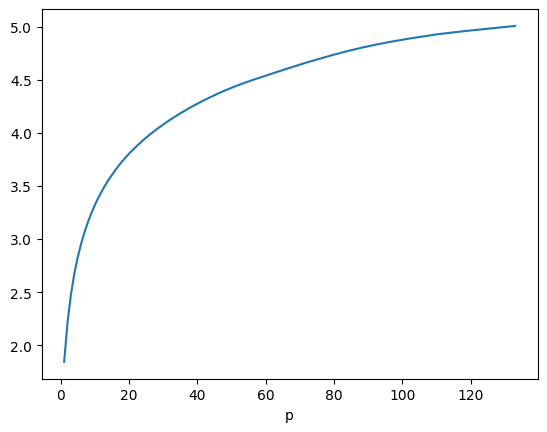

In [74]:
df[
    (df['N'] == 22) # & (df['p'] > 110) # & (df['p'] < 85)
].set_index('p')['merit factor'].plot()

In [10]:
import numpy as np

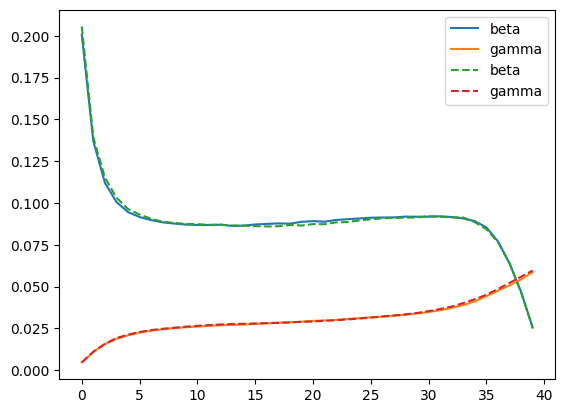

In [82]:
p = 40

row = df[(df['N'] == 25) & (df['p'] == p)].squeeze()
plt.plot(-np.array(row['beta']), label='beta')
plt.plot(row['gamma'], label='gamma')
row2 = df[(df['N'] == 22) & (df['p'] == p)].squeeze()
plt.plot(-np.array(row2['beta']), label='beta', linestyle='dashed')
plt.plot(np.array(row2['gamma'])*22/25, label='gamma', linestyle='dashed')
plt.legend()

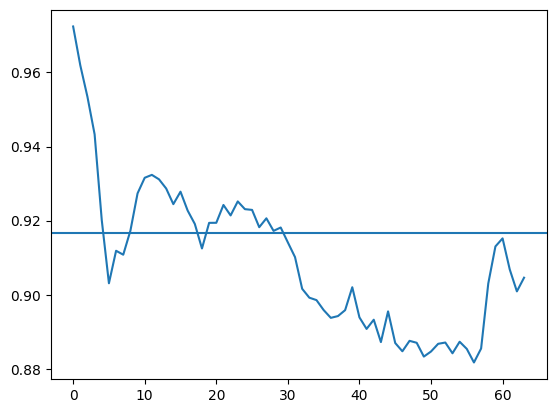

In [158]:
plt.plot(np.array(row['gamma']) / np.array(row2['gamma']))
plt.axhline(22/24)

In [14]:
df2 = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_overlap.json', orient='index')

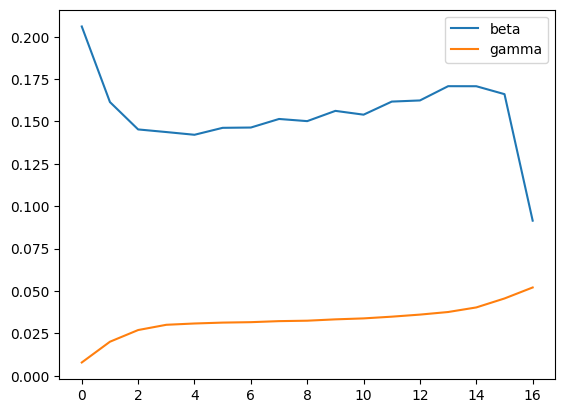

In [34]:
N = 29
p = 17

# row2 = df2[(df2['N'] == N) & (df2['p'] == p)].squeeze()
# plt.plot(-np.array(row2['beta']), label='beta', linestyle='dashed')
# plt.plot(row2['gamma'], label='gamma', linestyle='dashed')
row = df2[(df2['N'] == N-1) & (df2['p'] == p)].squeeze()
plt.plot(-np.array(row['beta']), label='beta')
plt.plot(row['gamma'], label='gamma')
plt.legend()

In [73]:
df[df['p'] == 1].sort_values('N').set_index('N')["beta"]

N
7            [-0.9864397458]
8             [0.1596153286]
8             [0.1596153286]
9             [0.1577906413]
10     [0.15950590450000002]
11            [0.1626080445]
12            [2.9805482152]
13     [0.16048291450000002]
14           [-0.1591259881]
15            [0.1585584523]
16           [-0.1564551136]
17           [-0.1553208176]
18           [-0.1554821409]
19            [-0.154852548]
20           [-0.1545995976]
21           [-0.1545408459]
22           [-0.1546263503]
23    [-0.15442231820000002]
24           [-0.1541986215]
25           [-0.1540331606]
26           [-0.1538636752]
27           [-0.1537288954]
28           [-0.1536579248]
29    [-0.15353160400000002]
Name: beta, dtype: object

In [72]:
df2[df2['p'] == 1].sort_values('N').set_index('N')["beta"]

N
6            [-0.8714324959]
7            [-0.2343153631]
8            [-0.2414471676]
9            [-0.1824335604]
10           [-0.1899602111]
11    [-0.21650302800000001]
12           [-0.2024329336]
13           [-0.2267147804]
14    [-0.19890920950000002]
15    [-0.22056757800000001]
16           [-0.2185113716]
17           [-0.2143813044]
18    [-0.21643900330000002]
19           [-0.2376144709]
20           [-0.2507995484]
21    [-0.24972915910000001]
22    [-0.22976252330000002]
23           [-0.2345314112]
24    [-0.24117213980000002]
Name: beta, dtype: object

In [71]:
df2[(df2['N'] == 24) & (df2['p'] == 1)].squeeze()

N                                   24
p                                    1
overlap                       0.000029
gamma                   [0.0419109681]
beta            [-0.24117213980000002]
merit factor                       NaN
Name: 697, dtype: object

In [70]:
df2[(df2['N'] == 22) & (df2['p'] == 1)].squeeze()

N                                   22
p                                    1
overlap                       0.000175
gamma                   [0.0423702937]
beta            [-0.22976252330000002]
merit factor                       NaN
Name: 606, dtype: object

# Does the offset have something to do with solution degeneracy?

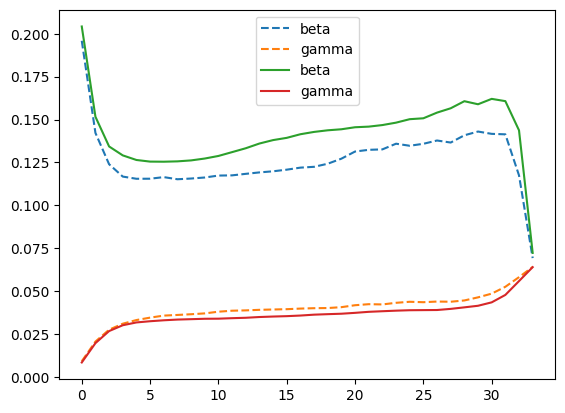

In [62]:
p = 34

row2 = df2[(df2['N'] == 23) & (df2['p'] == p)].squeeze()
plt.plot(-np.array(row2['beta']), label='beta', linestyle='dashed')
plt.plot(row2['gamma'], label='gamma', linestyle='dashed')
row = df2[(df2['N'] == 24) & (df2['p'] == p)].squeeze()
plt.plot(-np.array(row['beta']), label='beta')
plt.plot(np.array(row['gamma']), label='gamma')
plt.legend()

In [118]:
df2[df2['N'] == 24].set_index('p')['overlap']

p
1     0.000029
2     0.000096
3     0.000198
4     0.000345
5     0.000519
6     0.000709
7     0.000946
8     0.001237
9     0.001604
10    0.002076
11    0.002644
12    0.003261
13    0.003941
14    0.004560
15    0.005174
16    0.005865
17    0.006523
18    0.007241
19    0.007943
20    0.008657
21    0.009403
22    0.010191
23    0.011069
24    0.011935
25    0.012828
26    0.013742
27    0.014671
28    0.015648
29    0.016651
30    0.017717
31    0.018825
32    0.019962
33    0.021155
34    0.022413
Name: overlap, dtype: float64

In [57]:
df[df['N'] == 22].set_index('p')['merit factor'][-20:]

/tmp/ipykernel_40316/3600526677.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df[df['N'] == 22].set_index('p')['merit factor'][-20:]


p
114    4.941402
115    4.945099
116    4.948632
117    4.952368
118    4.955861
119    4.959300
120    4.962597
121    4.966511
122    4.969805
123    4.973240
124    4.976485
125    4.979846
126    4.983095
127    4.986357
128    4.989639
129    4.992819
130    4.996019
131    4.999070
132    5.002203
133    5.005464
Name: merit factor, dtype: float64

In [71]:
row["beta"][-1]

-0.0029547038

In [72]:
row["gamma"][0]

0.0039225289000000005

In [86]:
row['merit factor']

4.4053790578

In [41]:
true_optimal_mf[22]

6.205

In [61]:
get_random_guess_merit_factor(12)

1.4286857097107195

In [43]:
true_optimal_mf[18] 

6.48

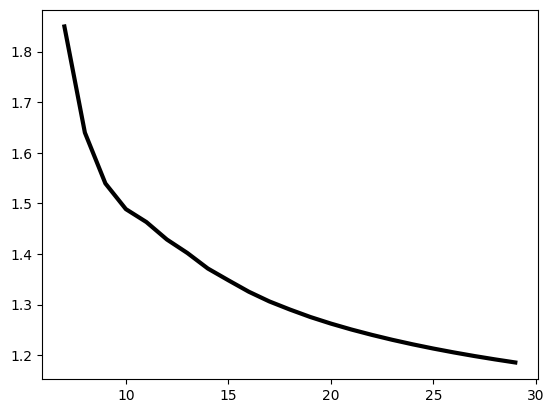

In [14]:

plt.plot(Ns, [get_random_guess_merit_factor(N) for N in Ns], c='k', linewidth=3)

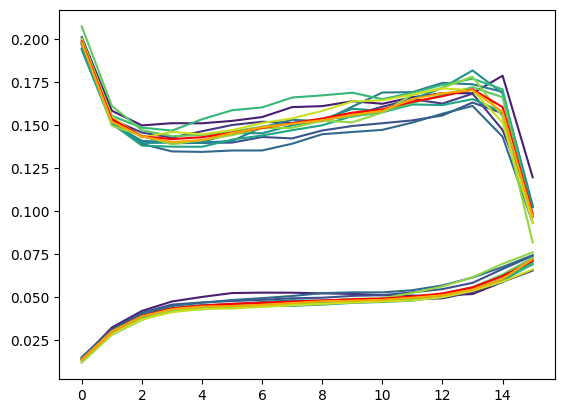

In [38]:
df2 = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_overlap.json', orient='index')

p = 16

dftmp = df2[(df2['p'] == p) & (df2['N'] >= 20)]
Ns = sorted(set(dftmp['N']))
cmap = sns.color_palette('viridis', len(Ns))

for idx, N in enumerate(Ns):
    row = dftmp[dftmp['N'] == N].squeeze()
    plt.plot(-np.array(row['beta']), c=cmap[idx])
    plt.plot(np.array(row['gamma']) * N / Ns[0], c=cmap[idx])
    
plt.plot(np.mean([-np.array(dftmp[dftmp['N'] == N].squeeze()['beta']) for N in Ns], axis=0), c='r')
plt.plot(np.mean([np.array(dftmp[dftmp['N'] == N].squeeze()['gamma']) * N / Ns[0] for N in Ns], axis=0), c='r')
plt.plot(np.median([-np.array(dftmp[dftmp['N'] == N].squeeze()['beta']) for N in Ns], axis=0), c='orange')
plt.plot(np.median([np.array(dftmp[dftmp['N'] == N].squeeze()['gamma']) * N / Ns[0] for N in Ns], axis=0), c='orange')

In [7]:
df = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_overlap.json', orient='index')
df[df['p'] == 16]

,N,p,overlap,gamma,beta,merit factor
58,11,16,0.392638,"[0.0391196802, 0.06731044400000001, 0.06424273...","[-0.2264458784, -0.14849854440000002, -0.13685...",5.871965
78,12,16,0.232069,"[0.0413669047, 0.07979607150000001, 0.08204142...","[-0.22729951810000001, -0.1575691596, -0.15842...",3.899626
112,13,16,0.092139,"[0.031127769000000003, 0.0584143686, 0.0750099...","[-0.1942167478, -0.1642017345, -0.1689285881, ...",3.219287
163,14,16,0.480480,"[0.0215290148, 0.045219060900000004, 0.0607080...","[-0.1983524807, -0.1541229124, -0.1489427271, ...",3.706657
180,15,16,0.109278,"[0.0220793965, 0.0476985096, 0.0578491302, 0.0...","[-0.21092815650000002, -0.1673939482, -0.15055...",3.101398
226,16,16,0.116804,"[0.016663450700000002, 0.0364088453, 0.0476177...","[-0.195991737, -0.1431350908, -0.1374842599000...",3.222514
301,17,16,0.115919,"[0.0166927053, 0.0359539214, 0.0487651569, 0.0...","[-0.19963075760000001, -0.1487858397, -0.13864...",3.094394
360,18,16,0.074016,"[0.0164303072, 0.0358079836, 0.0445253477, 0.0...","[-0.2033953634, -0.1547369569, -0.1436444737, ...",2.763265
406,19,16,0.027950,"[0.0167803644, 0.0358024981, 0.0449587753, 0.0...","[-0.2046269221, -0.1578752998, -0.1477012338, ...",2.213355
470,20,16,0.013229,"[0.0142048255, 0.0323993603, 0.0420500969, 0.0...","[-0.2011868182, -0.158453923, -0.1499020476, -...",2.154028
